In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Lab3')

In [ ]:
# импорт модулей
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from cf_matrix import make_confusion_matrix
from keras.models import load_model

In [ ]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 31)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


In [ ]:
# зададим параметры данных и модели
num_classes = 10
input_shape = (28, 28, 1)

# приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 28, 28, 1)
Shape of transformed X test: (10000, 28, 28, 1)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [ ]:
# создаем модель
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
# компилируем и обучаем модель
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 47s 109ms/step - loss: 0.3511 - accuracy: 0.8945 - val_loss: 0.0963 - val_accuracy: 0.9735
Epoch 2/15
422/422 [==============================] - 46s 108ms/step - loss: 0.1056 - accuracy: 0.9687 - val_loss: 0.0682 - val_accuracy: 0.9787
Epoch 3/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0790 - accuracy: 0.9761 - val_loss: 0.0556 - val_accuracy: 0.9823
Epoch 4/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0668 - accuracy: 0.9797 - val_loss: 0.0453 - val_accuracy: 0.9862
Epoch 5/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0575 - accuracy: 0.9827 - val_loss: 0.0452 - val_accuracy: 0.9857
Epoch 6/15
422/422 [==============================] - 44s 103ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0413 - val_accuracy: 0.9868
Epoch 7/15
422/422 [==============================] - 44s 103ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0409 - val_ac

In [ ]:
# оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0290 - accuracy: 0.9905
Loss on test data: 0.028966721147298813
Accuracy on test data: 0.9904999732971191


Модель обучилась более чем успешно, так как значение accuracy близко к 1, а loss близко к 0.

1/1 [==============================] - 0s 44ms/step
NN output: [[1.26347895e-05 9.89325762e-01 3.73655959e-04 9.95717073e-06
  5.54614095e-03 1.01521252e-07 4.99650525e-08 1.72397948e-03
  2.82371929e-03 1.84043078e-04]]


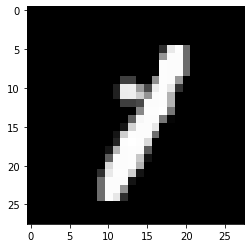

Real mark:  1
NN answer:  1
1/1 [==============================] - 0s 16ms/step
NN output: [[2.2087056e-07 1.5200183e-06 2.3108539e-06 2.7936292e-05 4.1805408e-05
  1.2104544e-05 2.7107034e-11 1.1260582e-03 6.4221034e-03 9.9236590e-01]]


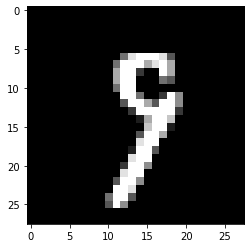

Real mark:  9
NN answer:  9


In [ ]:
# вывод тестового изображения и результата распознавания
n = 31
for i in range(2):
  result = model.predict(X_test[n+i:n+i+1])
  print('NN output:', result)
  plt.imshow(X_test[n+i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n+i]))
  print('NN answer: ', np.argmax(result))

Обе цифры из тестовой выборки распознаны правильно.

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       967
           1       1.00      0.99      0.99      1107
           2       0.98      0.99      0.99       970
           3       0.99      0.99      0.99      1023
           4       1.00      0.99      0.99      1008
           5       0.99      0.99      0.99       866
           6       0.99      0.99      0.99       965
           7       0.99      0.99      0.99      1070
           8       0.98      1.00      0.99       943
           9       0.99      0.98      0.99      1081

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



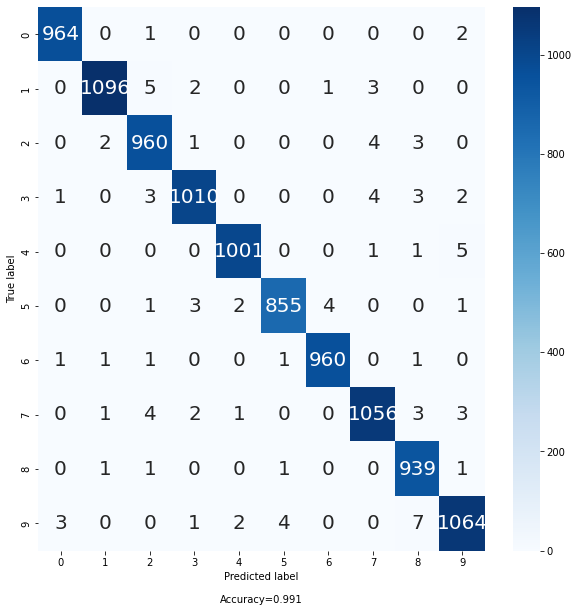

In [ ]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels))

# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# красивая отрисовка матрицы ошибок в виде "тепловой карты"
make_confusion_matrix(conf_matrix, percent=False, figsize=(10,10))

По рассчитанным показателям качества, видим, что recall для цифры 9, меньше чем для других цифр. Это значит, что 9 чаще всего путалась с другими  цифрами. 
Precision для цифр 2 и 8 имеет значение 0.98. Это значит, что другие цифры чаще всего были определены, как 2 и 8.
По выведенной матрице видим, что в целом модель допускает достаточно мало ошибок. Наиболее часто цифра 9 неправильно определялась, как 8. Это подтверждается предыдущими выводами.

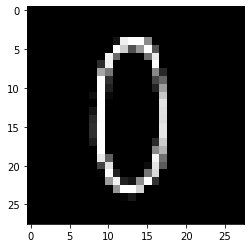

1/1 [==============================] - 0s 28ms/step
I think it's  0


In [ ]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('number_test.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()

# предобработка
test_img = test_img / 255
test_img = np.reshape(test_img, (1,28,28,1))

# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))

Собственное изображение распозналось правильно.

In [ ]:
# загрузка модели из лр1
model_lr1 = load_model('/content/drive/MyDrive/Colab Notebooks/Lab1/best_model')
# вывод архитектуры модели
model_lr1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 300)               30300     
                                                                 
 dense_7 (Dense)             (None, 10)                3010      
                                                                 
Total params: 111,810
Trainable params: 111,810
Non-trainable params: 0
_________________________________________________________________


Изменения во входных данных:  
–  Удалена единичная ось, которая определяла количество каналов в сверточной сети.   
–  Изображение 28 на 28 развернуто в вектор размерностью 784.
Выходные данные изменять не требуется.


In [ ]:
# предобработка
X_test = np.squeeze(X_test)
num_pixies = X_test.shape[1] * X_test.shape[2]
X_test = X_test.reshape(X_test.shape[0], num_pixies)
print('Shape of transformed X test:', X_test.shape)

Shape of transformed X test: (10000, 784)


In [ ]:
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X test: (10000, 10)


In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_lr1.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1336 - accuracy: 0.9610
Loss on test data: 0.13360458612442017
Accuracy on test data: 0.9610000252723694


**Выводы:**  
• количество настраиваемых параметров в сети   
В сверточной сети настройка параметров более трудоемкий процесс, так как сама сеть состоит из несколько блоков, каждый из которого требует отдельного внимания. 
Слой Conv2D определялся такими параметрами как количество фильтров, размер фильтра, функция активации и входной размерностью данных для первого слоя. В MaxPooling2D задавался размер окна пуллинга. Помимо этого необходимо еще задать параметры полносвязных слоев.

• количество эпох обучения   
Сверточной сети для обучения требуется на порядок меньше эпох, чем полносвязной.

• качество классификации тестовой выборки.   
Сравнивания, показатели качества двух сетей, можно заметить, что у сверточной сети значение accuracy лучше, чем у полносвязной. 